<a href="https://colab.research.google.com/github/manasamadgul/ML_Project/blob/main/Classify_15categories_Dinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.getcwd()


'/content'

In [2]:
import kagglehub

path = kagglehub.dataset_download("larserikrisholm/dinosaur-image-dataset-15-species")

# Download latest version
#path = kagglehub.dataset_download("cmglonly/simple-dinosurus-dataset")

print("Path to dataset files:", path)


100%|██████████| 462M/462M [00:17<00:00, 27.9MB/s]

Extracting model files...


Path to dataset files: /root/.cache/kagglehub/datasets/larserikrisholm/dinosaur-image-dataset-15-species/versions/2


In [3]:
import os
os.path.abspath(path)

'/root/.cache/kagglehub/datasets/larserikrisholm/dinosaur-image-dataset-15-species/versions/2'

['/root/.cache/kagglehub/datasets/larserikrisholm/dinosaur-image-dataset-15-species/versions/2', '/root/.cache/kagglehub/datasets/larserikrisholm/dinosaur-image-dataset-15-species/versions/2/dinosaur_dataset', '/root/.cache/kagglehub/datasets/larserikrisholm/dinosaur-image-dataset-15-species/versions/2/dinosaur_dataset/Spinosaurus', '/root/.cache/kagglehub/datasets/larserikrisholm/dinosaur-image-dataset-15-species/versions/2/dinosaur_dataset/Velociraptor', '/root/.cache/kagglehub/datasets/larserikrisholm/dinosaur-image-dataset-15-species/versions/2/dinosaur_dataset/Parasaurolophus', '/root/.cache/kagglehub/datasets/larserikrisholm/dinosaur-image-dataset-15-species/versions/2/dinosaur_dataset/Dimorphodon', '/root/.cache/kagglehub/datasets/larserikrisholm/dinosaur-image-dataset-15-species/versions/2/dinosaur_dataset/Brachiosaurus', '/root/.cache/kagglehub/datasets/larserikrisholm/dinosaur-image-dataset-15-species/versions/2/dinosaur_dataset/Dilophosaurus', '/root/.cache/kagglehub/dataset

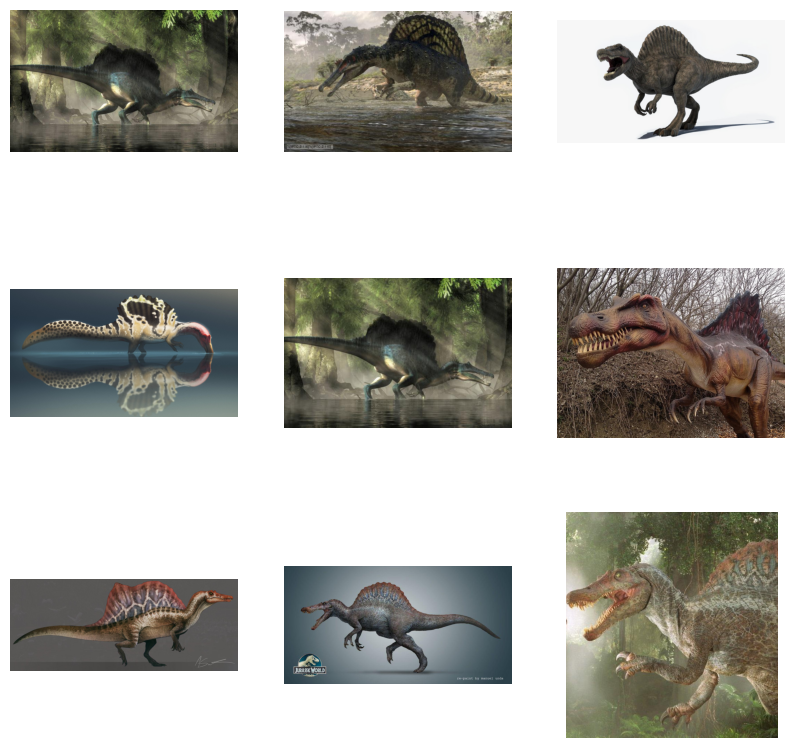

In [4]:
import os
from PIL import Image
import matplotlib.pyplot as plt


# Set the path to your dataset folder
os.chdir(path)
print([x[0] for x in os.walk(path)])
image_files = [os.path.join(dirpath, file)
               for dirpath, dirnames, filenames in os.walk(path)
               for file in filenames
               if file.endswith(('.jpg', '.png', '.jpeg'))]
print(len(image_files)) # Using len to get count

plt.figure(figsize=(10, 10))
for i, file in enumerate(image_files[:9]):  # Display the first 9 images
    img_path = os.path.join(path, file)
    img = Image.open(img_path)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()


In [5]:
from fastai.vision.all import *

# Define the path to the dataset
#path = Path('/root/.cache/kagglehub/datasets/cmglonly/simple-dinosurus-dataset/versions/1')

# Create a DataBlock
dino_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)  # Resizing images for uniformity
)

# Create a DataLoaders object
dls = dino_block.dataloaders(path, bs=32)  # bs is the batch size



In [6]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 187MB/s]


In [7]:
learn.fine_tune(8)  # Fine-tune for 5 epochs; adjust as needed

epoch,train_loss,valid_loss,error_rate,time
0,2.709235,1.373242,0.413088,01:05


epoch,train_loss,valid_loss,error_rate,time
0,1.398571,0.960076,0.294479,01:10
1,0.990747,0.812850,0.253579,01:08
2,0.676496,0.771356,0.235174,01:13
3,0.440438,0.657806,0.196319,01:07
4,0.278970,0.652716,0.190184,01:10
5,0.183348,0.645429,0.179959,01:06
6,0.119877,0.649975,0.184049,01:10
7,0.095726,0.637073,0.186094,01:07


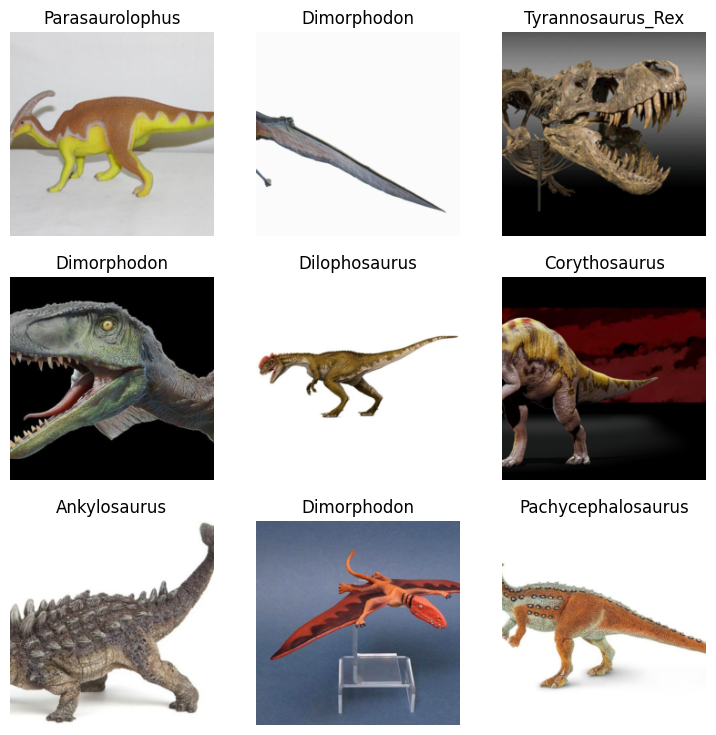

In [8]:
dls.show_batch(max_n=9)

In [9]:
!pip install ipywidgets


  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


Upload your own image to check if model actually works

In [30]:
learn.export()

In [31]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [32]:
learn_inf = load_learner(path/'export.pkl')

In [35]:
import ipywidgets as widgets
uploader = widgets.FileUpload()
uploader


FileUpload(value={}, description='Upload')

In [29]:
img = PILImage.create(uploader.data[0])
pred_class, pred_idx, probs = learn.predict(img)

print(f"Predicted class: {pred_class}")
print(f"Class index: {pred_idx}")
print(f"Class probabilities: {probs}")


Predicted class: Gallimimus
Class index: 6
Class probabilities: tensor([3.9280e-03, 1.6196e-01, 6.4731e-02, 5.2941e-06, 1.6927e-04, 3.2688e-04,
        7.2632e-01, 2.8372e-04, 1.0235e-03, 8.2524e-04, 3.9912e-04, 4.1447e-05,
        2.5058e-03, 2.4357e-04, 3.7237e-02])


In [37]:
learn_inf.dls.vocab

['Ankylosaurus', 'Brachiosaurus', 'Compsognathus', 'Corythosaurus', 'Dilophosaurus', 'Dimorphodon', 'Gallimimus', 'Microceratus', 'Pachycephalosaurus', 'Parasaurolophus', 'Spinosaurus', 'Stegosaurus', 'Triceratops', 'Tyrannosaurus_Rex', 'Velociraptor']